# <center>Upgrad Capstone</center>
#### <center>`Project facilitator: Prashant Bhide`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Project partner: Anilkumar Narayanam`</center>

## Subtask 5 - Model Building - Scenario1

In [1]:
# Importing the required libraries

import os, warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier

In [2]:
# Global configurations

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.4f}'.format)
pd.options.display.max_colwidth = 100

sns.set(context='notebook', style='darkgrid', font_scale=1.4)

%matplotlib inline
plt.rcParams['font.size'] = '14'

### Models for Scenario 1 - All the data present (i.e. geo data, app categories data, event data and devices data)

In [3]:
%%time
# We will read the Scenario1 dataset from earlier stage

df_scn1 = pd.read_csv('df_scn1.csv',
                      dtype={'device_id':str, 'gender':'category', 'age':'category', 'train_test_flag':'category'})
display(df_scn1)
df_scn1.info()

,device_id,gender,age,avg_events,train_test_flag,phone_brand_Coolpad,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_LG,...,cluster_id_116.0,cluster_id_117.0,cluster_id_118.0,cluster_id_119.0,cluster_id_120.0,cluster_id_121.0,cluster_id_122.0,cluster_id_123.0,cluster_id_124.0,cluster_id_125.0
0,-1001337759327040000,1,1,109,train,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1002733576670970000,1,2,55,train,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-1005411102947240000,1,2,44,train,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1006357788560220000,1,2,51,train,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1010331399860270000,1,1,4,train,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11203,990879148135067000,0,1,4,train,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11204,992109739203134000,0,2,251,train,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11205,998208026013018000,0,1,71,train,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11206,998402647311351000,1,0,4,train,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11208 entries, 0 to 11207
Columns: 697 entries, device_id to cluster_id_125.0
dtypes: category(3), float64(36), int64(657), object(1)
memory usage: 59.4+ MB
Wall time: 724 ms


In [4]:
%%time
# We will extract the summed-up numeric columns to be standardized, ignoring the categorical and one-hot-encoded columns

all_cols = list(df_scn1.columns)
cols_to_scale = ['avg_events', 'is_active', 'gaming', 'financial', 'travel', 'technology',
                 'family', 'children', 'education', 'lifestyle', 'social', 'services', 'others']
for col in all_cols:
    if (col.startswith('hour') or col.startswith('dayofweek') or col.startswith('cluster_id')):
        cols_to_scale.append(col)
    
print('cols_to_scale =', cols_to_scale)
del col, all_cols

cols_to_scale = ['avg_events', 'is_active', 'gaming', 'financial', 'travel', 'technology', 'family', 'children', 'education', 'lifestyle', 'social', 'services', 'others', 'hour_0.0', 'hour_1.0', 'hour_2.0', 'hour_3.0', 'hour_4.0', 'hour_5.0', 'hour_6.0', 'hour_7.0', 'hour_8.0', 'hour_9.0', 'hour_10.0', 'hour_11.0', 'hour_12.0', 'hour_13.0', 'hour_14.0', 'hour_15.0', 'hour_16.0', 'hour_17.0', 'hour_18.0', 'hour_19.0', 'hour_20.0', 'hour_21.0', 'hour_22.0', 'hour_23.0', 'dayofweek_1-Mon', 'dayofweek_2-Tue', 'dayofweek_3-Wed', 'dayofweek_4-Thu', 'dayofweek_5-Fri', 'dayofweek_6-Sat', 'dayofweek_7-Sun', 'cluster_id_-1.0', 'cluster_id_0.0', 'cluster_id_1.0', 'cluster_id_2.0', 'cluster_id_3.0', 'cluster_id_4.0', 'cluster_id_5.0', 'cluster_id_6.0', 'cluster_id_7.0', 'cluster_id_8.0', 'cluster_id_9.0', 'cluster_id_10.0', 'cluster_id_11.0', 'cluster_id_12.0', 'cluster_id_13.0', 'cluster_id_14.0', 'cluster_id_15.0', 'cluster_id_16.0', 'cluster_id_17.0', 'cluster_id_18.0', 'cluster_id_19.0', 'clus

In [5]:
%%time
# We will scale all the extracted columns using StandardScaler

standardizer = StandardScaler()
df_scn1[cols_to_scale] = standardizer.fit_transform(df_scn1[cols_to_scale])
display(df_scn1)
df_scn1.info()
del cols_to_scale, standardizer

,device_id,gender,age,avg_events,train_test_flag,phone_brand_Coolpad,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_LG,...,cluster_id_116.0,cluster_id_117.0,cluster_id_118.0,cluster_id_119.0,cluster_id_120.0,cluster_id_121.0,cluster_id_122.0,cluster_id_123.0,cluster_id_124.0,cluster_id_125.0
0,-1001337759327040000,1,1,0.1276,train,0,0,0,0,0,...,-0.0228,-0.0105,-0.0137,-0.0185,-0.0096,-0.0240,-0.0123,-0.0165,-0.0106,-0.0229
1,-1002733576670970000,1,2,-0.1960,train,0,0,0,1,0,...,-0.0228,-0.0105,-0.0137,-0.0185,-0.0096,-0.0240,-0.0123,-0.0165,-0.0106,-0.0229
2,-1005411102947240000,1,2,-0.2619,train,1,0,0,0,0,...,-0.0228,-0.0105,-0.0137,-0.0185,-0.0096,-0.0240,-0.0123,-0.0165,-0.0106,-0.0229
3,-1006357788560220000,1,2,-0.2199,train,0,0,0,0,0,...,-0.0228,-0.0105,-0.0137,-0.0185,-0.0096,-0.0240,-0.0123,-0.0165,-0.0106,-0.0229
4,-1010331399860270000,1,1,-0.5016,train,0,0,0,0,0,...,-0.0228,-0.0105,-0.0137,-0.0185,-0.0096,-0.0240,-0.0123,-0.0165,-0.0106,-0.0229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11203,990879148135067000,0,1,-0.5016,train,0,0,0,0,0,...,-0.0228,-0.0105,-0.0137,-0.0185,-0.0096,-0.0240,-0.0123,-0.0165,-0.0106,-0.0229
11204,992109739203134000,0,2,0.9786,train,0,0,0,0,0,...,-0.0228,-0.0105,-0.0137,-0.0185,-0.0096,-0.0240,-0.0123,-0.0165,-0.0106,-0.0229
11205,998208026013018000,0,1,-0.1001,train,0,0,0,0,0,...,-0.0228,-0.0105,-0.0137,-0.0185,-0.0096,-0.0240,-0.0123,-0.0165,-0.0106,-0.0229
11206,998402647311351000,1,0,-0.5016,train,0,0,0,1,0,...,-0.0228,-0.0105,-0.0137,-0.0185,-0.0096,-0.0240,-0.0123,-0.0165,-0.0106,-0.0229


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11208 entries, 0 to 11207
Columns: 697 entries, device_id to cluster_id_125.0
dtypes: category(3), float64(171), int64(522), object(1)
memory usage: 59.4+ MB
Wall time: 3.88 s


In [6]:
%%time
# We will perform the train test split based on the provided flags

df_scn1_train = df_scn1[df_scn1.train_test_flag=='train'].copy()
print('df_scn1_train.shape =', df_scn1_train.shape)

df_scn1_test = df_scn1[df_scn1.train_test_flag=='test'].copy()
print('df_scn1_test.shape =', df_scn1_test.shape)

df_scn1_train.shape = (8364, 697)
df_scn1_test.shape = (2844, 697)
Wall time: 78 ms


In [7]:
%%time
# We will separate out the train/test X and Y components for gender & age predictions

df_scn1_Xtrain = df_scn1_train.drop(columns=['device_id','gender','age','train_test_flag'])
df_scn1_gender_Ytrain = df_scn1_train['gender']
df_scn1_age_Ytrain = df_scn1_train['age']

df_scn1_Xtest  = df_scn1_test.drop(columns=['device_id','gender','age','train_test_flag'])
df_scn1_gender_Ytest  = df_scn1_test['gender']
df_scn1_age_Ytest  = df_scn1_test['age']

Wall time: 28.7 ms


### Gender and Age Prediction - LogisticRegression model

___We will opt for `Age Prediction as a Classification Problem` to enable a direct Age-related Campaigns mapping during Deployment.<br><br>Accordingly we will use `(multi_class='auto')` as the LogisticRegression variable selection for the Binary Gender prediction and `(multi_class='multinomial')` for the Multiclass Age prediction.___

In [8]:
%%time
# We will fit a LogisticRegression model on the train dataset for the gender and age class predictions

scn1_gender_LR = LogisticRegression(class_weight=None, multi_class='auto', random_state=0, max_iter=25)
scn1_gender_LR.fit(df_scn1_Xtrain, df_scn1_gender_Ytrain)
display(scn1_gender_LR)

scn1_age_LR = LogisticRegression(class_weight=None, multi_class='multinomial', random_state=0, max_iter=25)
scn1_age_LR.fit(df_scn1_Xtrain, df_scn1_age_Ytrain)
display(scn1_age_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=25,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=25,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Wall time: 1.12 s


In [9]:
%%time
# We will check the Scenario1 Gender and Age class prediction training and testing scores with the LR models

print('Scn1 Gender training score with LR =', scn1_gender_LR.score(df_scn1_Xtrain, df_scn1_gender_Ytrain))
print('Scn1 Gender testing score with LR =', scn1_gender_LR.score(df_scn1_Xtest, df_scn1_gender_Ytest))
print()
print('Scn1 Age training score with LR =', scn1_age_LR.score(df_scn1_Xtrain, df_scn1_age_Ytrain))
print('Scn1 Age testing score with LR =', scn1_age_LR.score(df_scn1_Xtest, df_scn1_age_Ytest))

Scn1 Gender training score with LR = 0.7146102343376375
Scn1 Gender testing score with LR = 0.7113220815752461

Scn1 Age training score with LR = 0.507532281205165
Scn1 Age testing score with LR = 0.46624472573839665
Wall time: 159 ms


In [10]:
%%time
# We will generate the Gender and Age class Y predictions and probabilities with the LR models

Ypreds_gender_LR = scn1_gender_LR.predict(df_scn1_Xtest)
Yprobs_gender_LR = scn1_gender_LR.predict_proba(df_scn1_Xtest)
Ypreds_age_LR = scn1_age_LR.predict(df_scn1_Xtest)
Yprobs_age_LR = scn1_age_LR.predict_proba(df_scn1_Xtest)

Wall time: 73 ms


___For the Binary Gender prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and ROC_AUC_Score metrics.<br><br>For the Multiclass Age prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and Multiclass-Log-Loss metrics.___

In [11]:
%%time
# We will check the Scenario1 Gender and Age class prediction testing evaluation metrics for the LR models

gender_accuracy_score = round(metrics.accuracy_score(df_scn1_gender_Ytest, Ypreds_gender_LR), 4)
print('Scn1 Gender Test Accuracy score with LR =', gender_accuracy_score)
print()

print('Scn1 Gender Test Confusion Matrix with LR:')
print(metrics.confusion_matrix(df_scn1_gender_Ytest, Ypreds_gender_LR))
print()

print('Scn1 Gender Test Classfication Report with LR:')
print(metrics.classification_report(df_scn1_gender_Ytest, Ypreds_gender_LR, digits=4))

gender_weighted_avg_f1_score = round(metrics.f1_score(df_scn1_gender_Ytest, Ypreds_gender_LR, average='weighted'), 4)
print('Scn1 Gender Test Weighted_Avg_F1_Score with LR =', gender_weighted_avg_f1_score)
print()

gender_roc_auc_score = round(metrics.roc_auc_score(df_scn1_gender_Ytest, Ypreds_gender_LR), 4)
print('Scn1 Gender Test ROC_AUC score with LR =', gender_roc_auc_score)

print('-' * 100)

age_accuracy_score = round(metrics.accuracy_score(df_scn1_gender_Ytest, Ypreds_age_LR), 4)
print('Scn1 Age Test Accuracy score with LR =', age_accuracy_score)
print()

print('Scn1 Age Test Confusion Matrix with LR:')
print(metrics.confusion_matrix(df_scn1_age_Ytest, Ypreds_age_LR))
print()

print('Scn1 Age Test Classfication Report with LR:')
print(metrics.classification_report(df_scn1_age_Ytest, Ypreds_age_LR, digits=4))

age_weighted_avg_f1_score = round(metrics.f1_score(df_scn1_age_Ytest, Ypreds_age_LR, average='weighted'), 4)
print('Scn1 Age Test Weighted_Avg_F1_Score with LR =', age_weighted_avg_f1_score)
print()

age_mlogloss = round(metrics.log_loss(df_scn1_age_Ytest, Yprobs_age_LR), 4)
print('Scn1 Age Test Multiclass Log-Loss with LR =', age_mlogloss)

Scn1 Gender Test Accuracy score with LR = 0.7113

Scn1 Gender Test Confusion Matrix with LR:
[[  40  758]
 [  63 1983]]

Scn1 Gender Test Classfication Report with LR:
              precision    recall  f1-score   support

           0     0.3883    0.0501    0.0888       798
           1     0.7235    0.9692    0.8285      2046

    accuracy                         0.7113      2844
   macro avg     0.5559    0.5097    0.4586      2844
weighted avg     0.6294    0.7113    0.6209      2844

Scn1 Gender Test Weighted_Avg_F1_Score with LR = 0.6209

Scn1 Gender Test ROC_AUC score with LR = 0.5097
----------------------------------------------------------------------------------------------------
Scn1 Age Test Accuracy score with LR = 0.4652

Scn1 Age Test Confusion Matrix with LR:
[[ 40 401 106]
 [ 54 805 350]
 [ 21 586 481]]

Scn1 Age Test Classfication Report with LR:
              precision    recall  f1-score   support

           0     0.3478    0.0731    0.1208       547
           1

In [12]:
# We will collate the metrics for later model comparison

all_gender_metrics = []
scn1_gender_LR_metrics = {
    'ModelType' : 'LogisticRegression',
    'Accuracy_Score' : gender_accuracy_score,
    'Weighted_Avg_F1_Score' : gender_weighted_avg_f1_score,
    'ROC_AUC_Score' : gender_roc_auc_score
}
all_gender_metrics.append(scn1_gender_LR_metrics)

all_age_metrics = []
scn1_age_LR_metrics = {
    'ModelType' : 'LogisticRegression',
    'Accuracy_Score' : age_accuracy_score,
    'Weighted_Avg_F1_Score' : age_weighted_avg_f1_score,
    'Multiclass_Log_Loss' : age_mlogloss
}
all_age_metrics.append(scn1_age_LR_metrics)

### Gender and Age Prediction - XGBoost model with HyperParameterTuning (HPT)

In [13]:
%%time
# We will define the Grid Search parameters for the Cross-Validation HyperParameterTuning (HPT)

'''
# A sample parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_by_tree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': range(60, 360, 40),
        'learning_rate': [0.1, 0.01, 0.05]
}
'''

# Param grid using above exact sample results in training time of over 50 hours
# So for performance reasons, we will settle for a much smaller HPT param grid
small_grid = {
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [2, 4, 6],
        'n_estimators': [10, 25]
}

Wall time: 0 ns


___We will use `(objective='binary:logistic', eval_metric='logloss')` as the XGBClassifier variable selection for the Binary Gender prediction and `(objective='multi:softprob', eval_metric='mlogloss')` for the Multiclass Age prediction.___

In [14]:
%%time
# We will fit the XGBClassifier with GridSearch HyperParameterTuning on the train dataset for gender and age class predictions

scn1_gender_base_xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
scn1_gender_XGB = GridSearchCV(estimator=scn1_gender_base_xgb, param_grid=small_grid,
                               cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
scn1_gender_XGB.fit(df_scn1_Xtrain, df_scn1_gender_Ytrain)

scn1_age_base_xgb = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')
scn1_age_XGB = GridSearchCV(estimator=scn1_age_base_xgb, param_grid=small_grid,
                            cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
scn1_age_XGB.fit(df_scn1_Xtrain, df_scn1_age_Ytrain)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  2.9min finished


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  7.1min finished


Wall time: 10min 7s


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_c...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=N

In [15]:
%%time
# We will extract the XGBClassifier best parameters and best estimators identified by the GridSearch HyperParameterTuning

print('Scn1 Gender XGBClassifier best parameters =', scn1_gender_XGB.best_params_)
scn1_gender_XGB_best = scn1_gender_XGB.best_estimator_
print('Scn1 Gender XGBClassifier best estimator =', scn1_gender_XGB_best)
print()
print('Scn1 AgeGroup XGBClassifier best parameters =', scn1_age_XGB.best_params_)
scn1_age_XGB_best = scn1_age_XGB.best_estimator_
print('Scn1 AgeGroup XGBClassifier best estimator =', scn1_age_XGB_best)

Scn1 Gender XGBClassifier best parameters = {'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 25, 'subsample': 1.0}
Scn1 Gender XGBClassifier best estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Scn1 AgeGroup XGBClassifier best parameters = {'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 25, 'subsample': 0.6}
Scn1 AgeGroup XGBClassi

In [16]:
%%time
# We will check the Scenario1 Gender and Age class prediction training and testing scores with the best XGB models

print('Scn1 Gender classification training score with XGB =', scn1_gender_XGB_best.score(df_scn1_Xtrain, df_scn1_gender_Ytrain))
print('Scn1 Gender classification testing score with XGB =', scn1_gender_XGB_best.score(df_scn1_Xtest, df_scn1_gender_Ytest))
print()
print('Scn1 AgeGroup classification training score with XGB =', scn1_age_XGB_best.score(df_scn1_Xtrain, df_scn1_age_Ytrain))
print('Scn1 AgeGroup classification testing score with XGB =', scn1_age_XGB_best.score(df_scn1_Xtest, df_scn1_age_Ytest))

Scn1 Gender classification training score with XGB = 0.7076757532281205
Scn1 Gender classification testing score with XGB = 0.7208157524613221

Scn1 AgeGroup classification training score with XGB = 0.501195600191296
Scn1 AgeGroup classification testing score with XGB = 0.470112517580872
Wall time: 431 ms


In [17]:
%%time
# We will generate the Gender and Age class Y predictions and probabilities with the best XGB models

Ypreds_gender_XGB = scn1_gender_XGB_best.predict(df_scn1_Xtest)
Yprobs_gender_XGB = scn1_gender_XGB_best.predict_proba(df_scn1_Xtest)
Ypreds_age_XGB = scn1_age_XGB_best.predict(df_scn1_Xtest)
Yprobs_age_XGB = scn1_age_XGB_best.predict_proba(df_scn1_Xtest)

Wall time: 178 ms


___For the Binary Gender prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and ROC_AUC_Score metrics.<br><br>For the Multiclass Age prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and Multiclass-Log-Loss metrics.___

In [18]:
%%time
# We will check the Scenario1 Gender and Age class prediction testing evaluation metrics for the best XGB models

gender_accuracy_score = round(metrics.accuracy_score(df_scn1_gender_Ytest, Ypreds_gender_XGB), 4)
print('Scn1 Gender Test Accuracy score with XGB =', gender_accuracy_score)
print()

print('Scn1 Gender Test Confusion Matrix with XGB:')
print(metrics.confusion_matrix(df_scn1_gender_Ytest, Ypreds_gender_XGB))
print()

print('Scn1 Gender Test Classfication Report with XGB:')
print(metrics.classification_report(df_scn1_gender_Ytest, Ypreds_gender_XGB, digits=4))

gender_weighted_avg_f1_score = round(metrics.f1_score(df_scn1_gender_Ytest, Ypreds_gender_XGB, average='weighted'), 4)
print('Scn1 Gender Test Weighted_Avg_F1_Score with LR =', gender_weighted_avg_f1_score)
print()

gender_roc_auc_score = round(metrics.roc_auc_score(df_scn1_gender_Ytest, Ypreds_gender_XGB), 4)
print('Scn1 Gender Test ROC_AUC score with XGB =', gender_roc_auc_score)

print('-' * 100)

age_accuracy_score = round(metrics.accuracy_score(df_scn1_age_Ytest, Ypreds_age_XGB), 4)
print('Scn1 Age Test Accuracy score with XGB =', age_accuracy_score)
print()

print('Scn1 Age Test Confusion Matrix with XGB:')
print(metrics.confusion_matrix(df_scn1_age_Ytest, Ypreds_age_XGB))
print()

print('Scn1 Age Test Classfication Report with XGB:')
print(metrics.classification_report(df_scn1_age_Ytest, Ypreds_age_XGB, digits=4))

age_weighted_avg_f1_score = round(metrics.f1_score(df_scn1_age_Ytest, Ypreds_age_XGB, average='weighted'), 4)
print('Scn1 Age Test Weighted_Avg_F1_Score with XGB =', age_weighted_avg_f1_score)
print()

age_mlogloss = round(metrics.log_loss(df_scn1_age_Ytest, Yprobs_age_XGB), 4)
print('Scn1 Age Test Multiclass Log-Loss with XGB =', age_mlogloss)

Scn1 Gender Test Accuracy score with XGB = 0.7208

Scn1 Gender Test Confusion Matrix with XGB:
[[   9  789]
 [   5 2041]]

Scn1 Gender Test Classfication Report with XGB:
              precision    recall  f1-score   support

           0     0.6429    0.0113    0.0222       798
           1     0.7212    0.9976    0.8372      2046

    accuracy                         0.7208      2844
   macro avg     0.6820    0.5044    0.4297      2844
weighted avg     0.6992    0.7208    0.6085      2844

Scn1 Gender Test Weighted_Avg_F1_Score with LR = 0.6085

Scn1 Gender Test ROC_AUC score with XGB = 0.5044
----------------------------------------------------------------------------------------------------
Scn1 Age Test Accuracy score with XGB = 0.4701

Scn1 Age Test Confusion Matrix with XGB:
[[ 13 459  75]
 [ 12 921 276]
 [  7 678 403]]

Scn1 Age Test Classfication Report with XGB:
              precision    recall  f1-score   support

           0     0.4062    0.0238    0.0449       547
     

In [19]:
# We will collate the metrics for later model comparison

scn1_gender_XGB_metrics = {
    'ModelType' : 'XGBoost_with_HPT',
    'Accuracy_Score' : gender_accuracy_score,
    'Weighted_Avg_F1_Score' : gender_weighted_avg_f1_score,
    'ROC_AUC_Score' : gender_roc_auc_score
}
all_gender_metrics.append(scn1_gender_XGB_metrics)

scn1_age_XGB_metrics = {
    'ModelType' : 'XGBoost_with_HPT',
    'Accuracy_Score' : age_accuracy_score,
    'Weighted_Avg_F1_Score' : age_weighted_avg_f1_score,
    'Multiclass_Log_Loss' : age_mlogloss
}
all_age_metrics.append(scn1_age_XGB_metrics)

### Gender and Age Prediction - StackingCVClassifier model

___We will use LogisticRegression and RandomForestClassifier as the Base Models, XGBClassifier as the Meta Learner, and StackingCVClassifier as the Cross-Validation Stacking Classifier.<br><br>We will also use `(objective='binary:logistic', eval_metric='logloss')` as the XGBClassifier variable selections for the Binary Gender prediction and `(objective='multi:softprob', eval_metric='mlogloss')` for the Multiclass Age prediction.___

In [20]:
%%time
# We will define the base models, meta learner, and stacking classifier models for the gender and age class predictions

scn1_gender_stkbase_LR1 = LogisticRegression(class_weight=None, multi_class='auto', random_state=0, max_iter=25)
scn1_gender_stkbase_RF2 = RandomForestClassifier(random_state=0, n_estimators=10)
scn1_gender_meta_XGB = XGBClassifier(objective='binary:logistic', eval_metric='logloss') # Binary LOGLOSS for Gender
scn1_gender_StkClf = StackingCVClassifier(classifiers=[scn1_gender_stkbase_LR1, scn1_gender_stkbase_RF2],
                                          meta_classifier=scn1_gender_meta_XGB, cv=3)

scn1_age_stkbase_LR1 = LogisticRegression(class_weight=None, multi_class='multinomial', random_state=0, max_iter=25)
scn1_age_stkbase_RF2 = RandomForestClassifier(random_state=0, n_estimators=10)
scn1_age_meta_XGB = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss') # Multi MLOGLOSS for Age
scn1_age_StkClf = StackingCVClassifier(classifiers=[scn1_age_stkbase_LR1, scn1_age_stkbase_RF2],
                                          meta_classifier=scn1_age_meta_XGB, cv=3)

Wall time: 0 ns


In [21]:
%%time
# We will fit the stacking classifier models on the train dataset for gender and age class predictions

scn1_gender_StkClf = scn1_gender_StkClf.fit(df_scn1_Xtrain, df_scn1_gender_Ytrain)
display(scn1_gender_StkClf)

scn1_age_StkClf = scn1_age_StkClf.fit(df_scn1_Xtrain, df_scn1_age_Ytrain)
display(scn1_age_StkClf)

StackingCVClassifier(classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None, max_iter=25,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                                  RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                            

StackingCVClassifier(classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None, max_iter=25,
                                                     multi_class='multinomial',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                                  RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                     

Wall time: 8.18 s


In [22]:
%%time
# We will check the Scenario1 Gender and Age class prediction training and testing scores with the Stacking Classifier models

print('Scn1 Gender training score with StkClf =', scn1_gender_StkClf.score(df_scn1_Xtrain, df_scn1_gender_Ytrain))
print('Scn1 Gender testing score with StkClf =', scn1_gender_StkClf.score(df_scn1_Xtest, df_scn1_gender_Ytest))
print()
print('Scn1 AgeGroup training score with StkClf =', scn1_age_StkClf.score(df_scn1_Xtrain, df_scn1_age_Ytrain))
print('Scn1 AgeGroup testing score with StkClf =', scn1_age_StkClf.score(df_scn1_Xtest, df_scn1_age_Ytest))

Scn1 Gender training score with StkClf = 0.7060019129603061
Scn1 Gender testing score with StkClf = 0.7194092827004219

Scn1 AgeGroup training score with StkClf = 0.5
Scn1 AgeGroup testing score with StkClf = 0.470112517580872
Wall time: 527 ms


In [23]:
%%time
# We will generate the Gender and Age class Y predictions with the Stacking Classifier models

Ypreds_gender_StkClf = scn1_gender_StkClf.predict(df_scn1_Xtest)
Yprobs_gender_StkClf = scn1_gender_StkClf.predict_proba(df_scn1_Xtest)
Ypreds_age_StkClf = scn1_age_StkClf.predict(df_scn1_Xtest)
Yprobs_age_StkClf = scn1_age_StkClf.predict_proba(df_scn1_Xtest)

Wall time: 278 ms


___For the Binary Gender prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and ROC_AUC_Score metrics.<br><br>For the Multiclass Age prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and Multiclass-Log-Loss metrics.___

In [24]:
%%time
# We will check the Scenario1 Gender and Age class prediction testing evaluation metrics for the Stacking Classifier models

gender_accuracy_score = round(metrics.accuracy_score(df_scn1_gender_Ytest, Ypreds_gender_StkClf), 4)
print('Scn1 Gender Test Accuracy score with StkClf =', gender_accuracy_score)
print()

print('Scn1 Gender Test Confusion Matrix with StkClf:')
print(metrics.confusion_matrix(df_scn1_gender_Ytest, Ypreds_gender_StkClf))
print()

print('Scn1 Gender Test Classfication Report with StkClf:')
print(metrics.classification_report(df_scn1_gender_Ytest, Ypreds_gender_StkClf, digits=4))

gender_weighted_avg_f1_score = round(metrics.f1_score(df_scn1_gender_Ytest, Ypreds_gender_StkClf, average='weighted'), 4)
print('Scn1 Gender Test Weighted_Avg_F1_Score with StkClf =', gender_weighted_avg_f1_score)
print()

gender_roc_auc_score = round(metrics.roc_auc_score(df_scn1_gender_Ytest, Ypreds_gender_StkClf), 4)
print('Scn1 Gender Test ROC_AUC score with StkClf =', gender_roc_auc_score)

print('-' * 100)

age_accuracy_score = round(metrics.accuracy_score(df_scn1_age_Ytest, Ypreds_age_StkClf), 4)
print('Scn1 Age Test Accuracy score with StkClf =', age_accuracy_score)
print()

print('Scn1 Age Test Confusion Matrix with StkClf:')
print(metrics.confusion_matrix(df_scn1_age_Ytest, Ypreds_age_StkClf))
print()

print('Scn1 Age Test Classfication Report with StkClf:')
print(metrics.classification_report(df_scn1_age_Ytest, Ypreds_age_StkClf, digits=4))

age_weighted_avg_f1_score = round(metrics.f1_score(df_scn1_age_Ytest, Ypreds_age_StkClf, average='weighted'), 4)
print('Scn1 Age Test Weighted_Avg_F1_Score with StkClf =', age_weighted_avg_f1_score)
print()

age_mlogloss = round(metrics.log_loss(df_scn1_age_Ytest, Yprobs_age_StkClf), 4)
print('Scn1 Age Test Multiclass Log-Loss with StkClf =', age_mlogloss)

Scn1 Gender Test Accuracy score with StkClf = 0.7194

Scn1 Gender Test Confusion Matrix with StkClf:
[[   0  798]
 [   0 2046]]

Scn1 Gender Test Classfication Report with StkClf:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       798
           1     0.7194    1.0000    0.8368      2046

    accuracy                         0.7194      2844
   macro avg     0.3597    0.5000    0.4184      2844
weighted avg     0.5175    0.7194    0.6020      2844

Scn1 Gender Test Weighted_Avg_F1_Score with StkClf = 0.602

Scn1 Gender Test ROC_AUC score with StkClf = 0.5
----------------------------------------------------------------------------------------------------
Scn1 Age Test Accuracy score with StkClf = 0.4701

Scn1 Age Test Confusion Matrix with StkClf:
[[  0 453  94]
 [  0 878 331]
 [  0 629 459]]

Scn1 Age Test Classfication Report with StkClf:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0

In [25]:
# We will collate the metrics for later model comparison

scn1_gender_StkClf_metrics = {
    'ModelType' : 'StackingCVClassifier',
    'Accuracy_Score' : gender_accuracy_score,
    'Weighted_Avg_F1_Score' : gender_weighted_avg_f1_score,
    'ROC_AUC_Score' : gender_roc_auc_score
}
all_gender_metrics.append(scn1_gender_StkClf_metrics)

scn1_age_StkClf_metrics = {
    'ModelType' : 'StackingCVClassifier',
    'Accuracy_Score' : age_accuracy_score,
    'Weighted_Avg_F1_Score' : age_weighted_avg_f1_score,
    'Multiclass_Log_Loss' : age_mlogloss
}
all_age_metrics.append(scn1_age_StkClf_metrics)

### Models Comparison and Final Models Selection

In [26]:
# Retrieving and combining the performance evaluation metrics from earlier models

df_gender_metrics = pd.DataFrame(data=all_gender_metrics)
display(df_gender_metrics)

df_age_metrics = pd.DataFrame(data=all_age_metrics)
display(df_age_metrics)

,ModelType,Accuracy_Score,Weighted_Avg_F1_Score,ROC_AUC_Score
0,LogisticRegression,0.7113,0.6209,0.5097
1,XGBoost_with_HPT,0.7208,0.6085,0.5044
2,StackingCVClassifier,0.7194,0.6020,0.5000


,ModelType,Accuracy_Score,Weighted_Avg_F1_Score,Multiclass_Log_Loss
0,LogisticRegression,0.4652,0.4330,1.0907
1,XGBoost_with_HPT,0.4701,0.4157,1.0025
2,StackingCVClassifier,0.4701,0.4136,1.0226


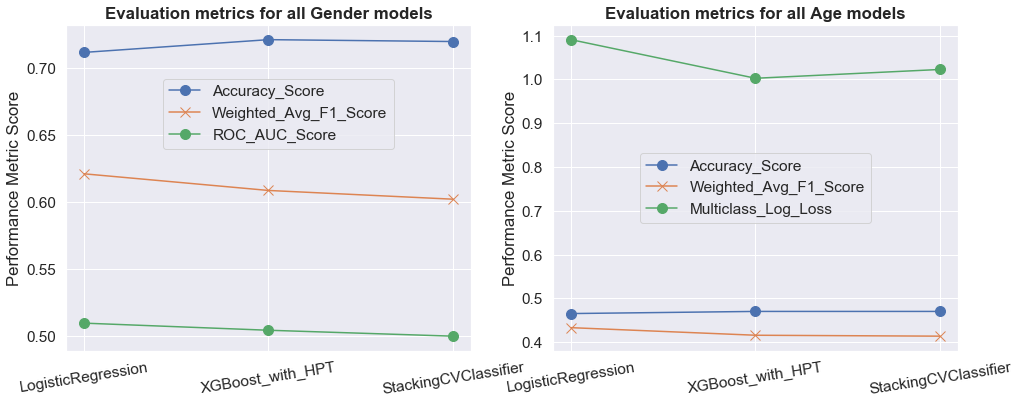

In [27]:
# Plotting the performance evaluation metrics together for all models

plt.figure(figsize=(16,6));

plt.subplot(1,2,1)
plt.title(label='Evaluation metrics for all Gender models', fontdict=dict(fontweight='bold'));
plt.plot('ModelType', 'Accuracy_Score', data=df_gender_metrics, marker='o', markersize=10);
plt.plot('ModelType', 'Weighted_Avg_F1_Score', data=df_gender_metrics, marker='x', markersize=10);
plt.plot('ModelType', 'ROC_AUC_Score', data=df_gender_metrics, marker='o', markersize=10);
plt.legend(labels=['Accuracy_Score', 'Weighted_Avg_F1_Score', 'ROC_AUC_Score'], loc=(0.24,0.62));
plt.xticks(rotation=9);
plt.ylabel('Performance Metric Score');

plt.subplot(1,2,2)
plt.title(label='Evaluation metrics for all Age models', fontdict=dict(fontweight='bold'));
plt.plot('ModelType', 'Accuracy_Score', data=df_age_metrics, marker='o', markersize=10);
plt.plot('ModelType', 'Weighted_Avg_F1_Score', data=df_age_metrics, marker='x', markersize=10);
plt.plot('ModelType', 'Multiclass_Log_Loss', data=df_age_metrics, marker='o', markersize=10);
plt.legend(labels=['Accuracy_Score', 'Weighted_Avg_F1_Score', 'Multiclass_Log_Loss'], loc='center');
plt.xticks(rotation=9);
plt.ylabel('Performance Metric Score');

plt.show();

___The final models to be selected for deployment are expected to display a balanced 'Female' / 'Male' Gender prediction, as well as a balanced [0-24] / [25-32] / [32+] Age group prediction, without any specific class bias.<br><br>Accordingly, we will opt for the "weighted avg f1-score" as the evaluation metric, since that corresponds to the harmonic balance between Precision and Recall of all the class labels.<br><br>As per this metric, the winning model for the Scenario1 dataset is LogisticRegression for both Gender and Age predictions !!!___

In [28]:
# We will define a function to calculate the KS statistic for classification model

def generate_KS(data=None, target=None, prob=None, deciles=10):
    data = data.copy()
    data[target] = data[target].astype(int)
    data['NegClass'] = 1 - data[target]
    data['DecileNum'] = pd.qcut(data[prob], deciles)
    grouped = data.groupby('DecileNum', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['NegClass']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['NegClass'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['NegClass'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100
    kstable['cum_eventrate'] = kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate'] = kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,deciles+1)
    kstable.index.rename('Decile', inplace=True)
    print('KS is', str(max(kstable['KS'])), '% at decile', str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [29]:
# We will calculate and display the KS statistic table for the Gender LogisticRegression model

df_temp = pd.DataFrame(data={'GenderClass':Ypreds_gender_LR, 'PositiveClassProbability':Yprobs_gender_LR[:,1]})
df_KStable = generate_KS(data=df_temp, target='GenderClass', prob='PositiveClassProbability', deciles=10)
display(df_KStable)

KS is 93.4 % at decile 9


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.8456,1.0000,285,0,10.40%,0.00%,10.40%,0.00%,10.4000
2,0.7956,0.8453,284,0,10.36%,0.00%,20.76%,0.00%,20.8000
3,0.7632,0.7955,284,0,10.36%,0.00%,31.12%,0.00%,31.1000
4,0.7385,0.7631,285,0,10.40%,0.00%,41.52%,0.00%,41.5000
5,0.7081,0.7384,284,0,10.36%,0.00%,51.88%,0.00%,51.9000
6,0.6803,0.7080,284,0,10.36%,0.00%,62.24%,0.00%,62.2000
7,0.6544,0.6803,285,0,10.40%,0.00%,72.64%,0.00%,72.6000
8,0.6259,0.6543,284,0,10.36%,0.00%,83.00%,0.00%,83.0000
9,0.5762,0.6259,284,0,10.36%,0.00%,93.36%,0.00%,93.4000


___From the KS Statistics table, we can see that the [Class 0 = 'Female'] prediction probabilities are all concentrated in the 10th decile when calculated as per the default 0.50 probability threshold used by the Gender LogisticRegression model.<br><br>Accordingly we will plot the Precision-Recall curves for this model and verify if there could be any adjustment to the probability threshold.___

In [53]:
%%time

# We will define a function to plot the Precision Recall vs. Thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(16, 8))
    plt.title("Precision and Recall Scores vs. Probability Threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Probability Threshold")
    plt.locator_params(axis='y', nbins=20)
    plt.locator_params(axis='x', nbins=40)
    plt.annotate('Probability Threshold = 0.65 at point of convergence', xy=(0.65,0.75),
                 xytext=(0.20,0.52), arrowprops = dict(facecolor='green', shrink=0.05),)
    plt.legend(loc='best')

Wall time: 0 ns


In [31]:
precisions, recalls, thresholds = metrics.precision_recall_curve(df_scn1_gender_Ytest, Yprobs_gender_LR[:, 1], pos_label='1')

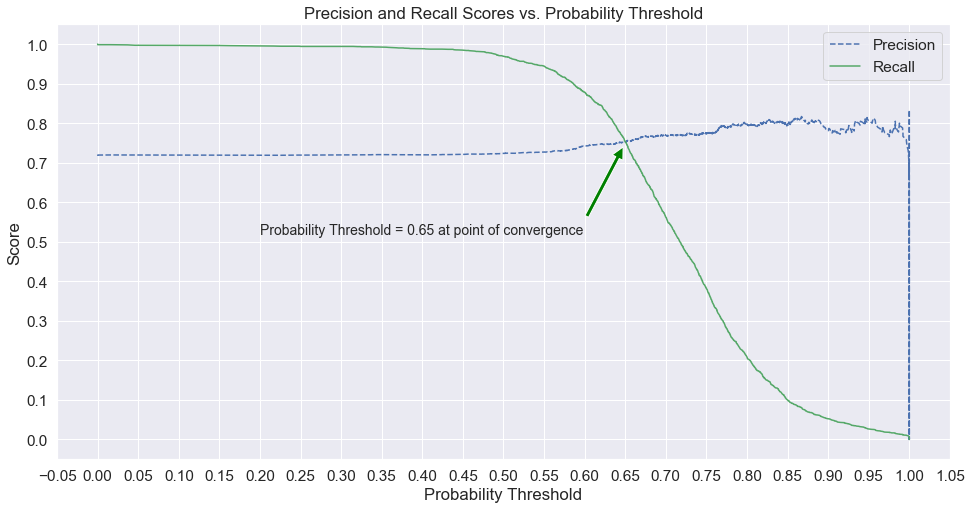

In [54]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

___From the Precision-Recall scores, we can see a convergence or optimal cutoff at the `Probability Threshold = 0.65` mark.<br><br>Accordingly, we will re-calculate the Gender class predictions using this 0.65 value replacing the default 0.50 value, and re-generate the KS Statistics table for the adjusted Gender class predictions.___

In [33]:
# Adjusting the Gender class predictions using the 0.65 Probability Threshold value
df_temp['GenderClass'] = df_temp['PositiveClassProbability'].apply(lambda x: '1' if x > 0.65 else '0')

df_KStable = generate_KS(data=df_temp, target='GenderClass', prob='PositiveClassProbability', deciles=10)
display(df_KStable)

KS is 97.1 % at decile 7


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.8456,1.0000,285,0,13.90%,0.00%,13.90%,0.00%,13.9000
2,0.7956,0.8453,284,0,13.85%,0.00%,27.74%,0.00%,27.7000
3,0.7632,0.7955,284,0,13.85%,0.00%,41.59%,0.00%,41.6000
4,0.7385,0.7631,285,0,13.90%,0.00%,55.49%,0.00%,55.5000
5,0.7081,0.7384,284,0,13.85%,0.00%,69.33%,0.00%,69.3000
6,0.6803,0.7080,284,0,13.85%,0.00%,83.18%,0.00%,83.2000
7,0.6544,0.6803,285,0,13.90%,0.00%,97.07%,0.00%,97.1000
8,0.6259,0.6543,60,224,2.93%,28.25%,100.00%,28.25%,71.8000
9,0.5762,0.6259,0,284,0.00%,35.81%,100.00%,64.06%,35.9000


In [34]:
top_3_band = df_KStable.loc[3]
class_1_min_prob = round(top_3_band.min_prob, 4)

bottom_3_band = df_KStable.loc[8]
class_0_max_prob = round(bottom_3_band.max_prob, 4)

print('class_1_min_prob =', class_1_min_prob, ', class_0_max_prob =', class_0_max_prob)

class_1_min_prob = 0.7632 , class_0_max_prob = 0.6543


___From the re-generated KS Statistics table, we can see that the Top 3 probability bands corresponding to [Class 1 = 'Male'] class fall in the [0.7632 - 1.0000] range, while the Bottom 3 probability bands corresponding to [Class 0 = 'Female'] class fall in the [0.0000 - 0.6543] range.<br><br>These exact probability ranges will be used during Deployment for the Gender-based Campaigns mapping to target the highest response rate.___

In [35]:
%%time
# We will re-calculate the Scenario1 Gender testing evaluation metrics using the adjusted class prediction values

Ypreds_gender_LR = df_temp['GenderClass']

gender_accuracy_score = round(metrics.accuracy_score(df_scn1_gender_Ytest, Ypreds_gender_LR), 4)
print('Scn1 Gender Test Accuracy score with LR =', gender_accuracy_score)
print()

print('Scn1 Gender Test Confusion Matrix with LR:')
print(metrics.confusion_matrix(df_scn1_gender_Ytest, Ypreds_gender_LR))
print()

print('Scn1 Gender Test Classfication Report with LR:')
print(metrics.classification_report(df_scn1_gender_Ytest, Ypreds_gender_LR, digits=4))

gender_weighted_avg_f1_score = round(metrics.f1_score(df_scn1_gender_Ytest, Ypreds_gender_LR, average='weighted'), 4)
print('Scn1 Gender Test Weighted_Avg_F1_Score with LR =', gender_weighted_avg_f1_score)
print()

gender_roc_auc_score = round(metrics.roc_auc_score(df_scn1_gender_Ytest, Ypreds_gender_LR), 4)
print('Scn1 Gender Test ROC_AUC score with LR =', gender_roc_auc_score)

Scn1 Gender Test Accuracy score with LR = 0.6438

Scn1 Gender Test Confusion Matrix with LR:
[[ 289  509]
 [ 504 1542]]

Scn1 Gender Test Classfication Report with LR:
              precision    recall  f1-score   support

           0     0.3644    0.3622    0.3633       798
           1     0.7518    0.7537    0.7527      2046

    accuracy                         0.6438      2844
   macro avg     0.5581    0.5579    0.5580      2844
weighted avg     0.6431    0.6438    0.6435      2844

Scn1 Gender Test Weighted_Avg_F1_Score with LR = 0.6435

Scn1 Gender Test ROC_AUC score with LR = 0.5579
Wall time: 146 ms


___We can see that the Gender "weighted avg f1-score" and "ROC_AUC score" has improved after the Probability Threshold optimal cutoff change.___

### Saving Final Model Artifacts for Deployment

In [36]:
%%time
# We will persist the Scenario1 Test dataset to local storage for retrieval and processing during the Deployment stage

df_scn1_test.to_csv('df_scn1_test.csv', header=True, index=False)

Wall time: 2.63 s


In [37]:
%%time
# We will persist the KS Statistics table to local storage for retrieval and processing during the Deployment stage

df_KStable.to_csv('df_KStable.csv', header=True, index=True)

Wall time: 3 ms


In [38]:
%%time
# We will persist the Scenario1 Gender and Age class prediction LR models to
# local storage for retrieval and processing during the Deployment stage

pickle.dump(scn1_gender_LR, open('scn1_gender_LR.pkl', 'wb'))
pickle.dump(scn1_age_LR, open('scn1_age_LR.pkl', 'wb'))

Wall time: 3 ms


___With this we have reached the end of the ModelBuilding_Scenario1 stage. ModelBuilding_Scenario2 will be taken up in the next stage.___